In [2]:
import ast
import csv
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import re

X_LIM = np.inf
X_ARR = np.array([-X_LIM, X_LIM])

Y_LIM = 1.2
NUM_Y_PARTS = 4
Y_ARR = np.linspace(-Y_LIM, Y_LIM, NUM_Y_PARTS + 1)

YAW_LIM = np.pi / 12
NUM_YAW_PARTS = 10
YAW_ARR = np.linspace(-YAW_LIM, YAW_LIM, NUM_YAW_PARTS + 1)

PARTITION = (X_ARR, Y_ARR, YAW_ARR)
BOUND_LIST = list(list(zip(x_arr[:-1], x_arr[1:])) for x_arr in PARTITION)
PART_LIST = list(itertools.product(*BOUND_LIST))  



File: part-000-pre.data; #pos: 28; #neg: 6
File: part-001-pre.data; #pos: 218; #neg: 115
File: part-002-pre.data; #pos: 613; #neg: 76
File: part-003-pre.data; #pos: 691; #neg: 114
File: part-004-pre.data; #pos: 745; #neg: 84
File: part-005-pre.data; #pos: 639; #neg: 101
File: part-006-pre.data; #pos: 667; #neg: 108
File: part-007-pre.data; #pos: 510; #neg: 69
File: part-008-pre.data; #pos: 678; #neg: 59
File: part-009-pre.data; #pos: 644; #neg: 42
File: part-010-pre.data; #pos: 395; #neg: 143
File: part-011-pre.data; #pos: 532; #neg: 122
File: part-012-pre.data; #pos: 625; #neg: 128
File: part-013-pre.data; #pos: 702; #neg: 1219
File: part-014-pre.data; #pos: 670; #neg: 4268
File: part-015-pre.data; #pos: 667; #neg: 233
File: part-016-pre.data; #pos: 572; #neg: 67
File: part-017-pre.data; #pos: 623; #neg: 31
File: part-018-pre.data; #pos: 667; #neg: 8
File: part-019-pre.data; #pos: 546; #neg: 50
File: part-020-pre.data; #pos: 561; #neg: 41
File: part-021-pre.data; #pos: 494; #neg: 19
F

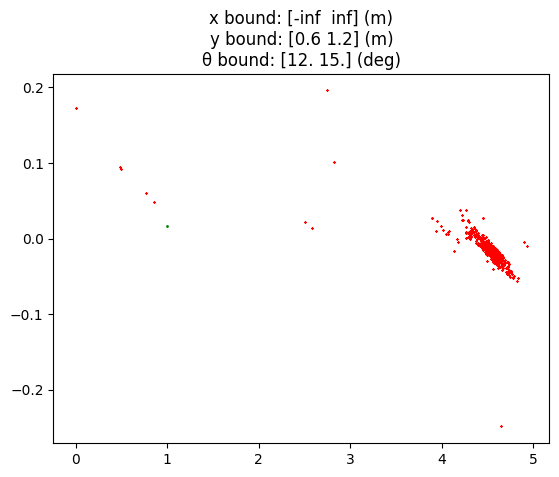

In [3]:
from numpy import arange
from sympy import continued_fraction


csv_path_list = list(pathlib.Path(".").glob("part-???-pre.data"))
csv_path_list.sort()
for csv_path in csv_path_list:
    m = re.match("^part-(?P<partid>\d+)-pre.data$", csv_path.name)
    partid = int(m["partid"])
    part_bnd = np.asfarray(PART_LIST[partid])

    # Reset the plot
    plt.gca().clear()
    plt.gca().set_title(
        f"x bound: {part_bnd[0]} (m)\n"
        f"y bound: {part_bnd[1]} (m)\n"
        f"θ bound: {np.rad2deg(part_bnd[2])} (deg)"
    )

    pos_fvs, neg_fvs = [], []

    with open(csv_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for entry in csvreader:
            if entry[2].lower() == "true":
                pos_fvs.append(tuple(ast.literal_eval(e) for e in entry[0:2]))
            else:
                assert entry[2].lower() == "false"
                neg_fvs.append(tuple(ast.literal_eval(e) for e in entry[0:2]))
        print(f"File: {csv_path.name}; #pos: {len(pos_fvs)}; #neg: {len(neg_fvs)}")

    pos_fv_arr = np.asfarray(pos_fvs)
    plt.scatter(pos_fv_arr[:, 0], pos_fv_arr[:, 1], c="g", marker="o", s=1)

    neg_fv_arr = np.asfarray(neg_fvs)
    plt.scatter(neg_fv_arr[:, 0], neg_fv_arr[:, 1], c="r", marker="x", s=1)

    # dx = np.linspace(-1, 0.5,500)
    # dy = np.linspace(-0.3, 0.5, 500)
    # x,y = np.meshgrid(dx,dy)
    # if partid == 16:
    #      region = (-3486699801877165/72057594037927936 < 1*y) & \
    #         ((2774949835903621/36028797018963968 >= (1*x + -1*y))
    #         &(-649018808849943/1125899906842624 < (1*x + -1*y))
    #         &( (4806281874582455/288230376151711744 >= (1*x + 1*y))
    #          | (2006731648131879/288230376151711744 >= 1*y)
    #          )
    #         )
    # if partid == 0:
    #     region = ((y>-0.008467263) & (x+y>-0.7293049)).astype(int)
    #     plt.gca().set_xlim(-1, 1)
    #     plt.gca().set_xlim(-2.2, 0.2)
    # elif partid == 9:
    #     region = (((x+y<=-1.141609) & (y>0.09126037)) | ((x+y>-1.141609) & (y>-0.1772965))).astype(int)
    #     plt.gca().set_xlim(-2.5, 2.5)
    #     plt.gca().set_ylim(-0.42, 0.25)
    # elif partid == 17:    
    #     region = ((y>-0.0121161) & (y<=0.02008105) & (x+y>-0.6796197) & (x+y<=0.05748017)).astype(int)
    #     plt.gca().set_xlim(-1, 1)
    #     plt.gca().set_ylim(-0.25, 0.25)
    # else:
    #     pass
    # plt.imshow( region, 
    #             extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3)
    plt.savefig(csv_path.with_suffix(".png"))